In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%store -r student_courses
%store -r student_majors
%store -r stem_paths
%store -r jacobs
%store -r jacobs_ethnicities
%store -r bcdi
%store -r waivers
%store -r beeps

In [3]:
cleaned_jacobs = jacobs.loc[jacobs['ppsk'] != 'MISSING']
cleaned_jacobs['ppsk'] = cleaned_jacobs.loc[:, 'ppsk'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
demographics = student_courses[['ppsk']].merge(stem_paths[['ppsk', 'ethnic.l1', 'gender']], on='ppsk', how='left').drop_duplicates().rename(columns={'ethnic.l1': 'Ethnicity', 'gender': 'Gender'})
urms = demographics[demographics['Ethnicity'] == 'Underrepresented Minority']
urms

,ppsk,Ethnicity,Gender
706,787652,Underrepresented Minority,Male
708,791882,Underrepresented Minority,Female
721,813809,Underrepresented Minority,Male
1249,609891,Underrepresented Minority,Male
1932,656505,Underrepresented Minority,Female
...,...,...,...
4414192,2768138,Underrepresented Minority,Female
4414199,2769675,Underrepresented Minority,Male
4609806,1487118,Underrepresented Minority,Female
5377072,2428229,Underrepresented Minority,Male


In [5]:
test = pd.DataFrame(index = ['Other Ethnicities', 'Underrepresented Minorities'], data = 
[demographics.groupby('Ethnicity').count().loc[[True,True,False,True]].sum(),
demographics.groupby('Ethnicity').count().loc['Underrepresented Minority']])

In [ ]:
women = pd.DataFrame(index = ['Other Ethnicities', 'Underrepresented Minorities'], data = 
[demographics.groupby('Ethnicity').count().loc[[True,True,False,True]].sum(),
demographics.groupby('Ethnicity').count().loc['Underrepresented Minority']])

Text(0.5, 1.0, 'URMs at Berkeley')

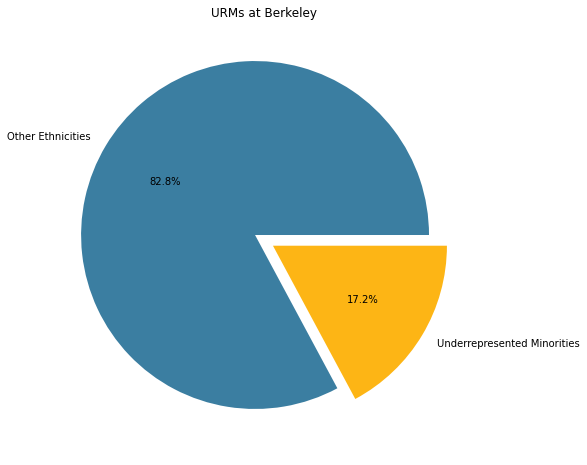

In [6]:
urms_berk = test['ppsk']

blue_gold = [(0.231,0.494,0.631),(0.992,0.709,0.082)]
plt.figure(figsize = (10,8))
plt.pie(urms_berk, labels = urms_berk.index, autopct="%.1f%%", explode=[0.06]*2, pctdistance=0.6, colors=blue_gold)
plt.title("URMs at Berkeley")

In [7]:
urms_women = urms.groupby('Gender').count().loc[[False,True,True],:].reindex(['Male','Female']).rename(index={'Male':'Men', 'Female':'Women'})['ppsk']
urms_women

Gender
Men      5915
Women    7854
Name: ppsk, dtype: int64

Text(0.5, 1.0, 'Proportion of URM Women at Berkeley')

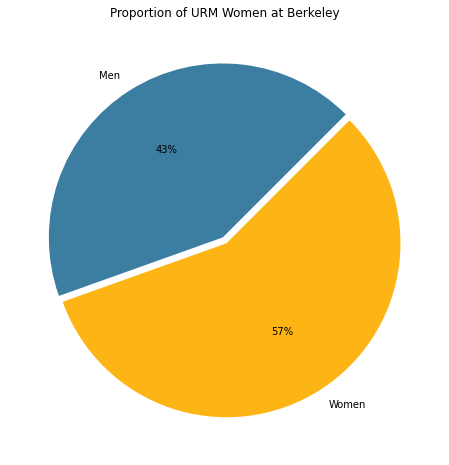

In [8]:
plt.figure(figsize = (10,8))
plt.pie(urms_women, labels=urms_women.index, colors=blue_gold, autopct="%.0f%%", explode=[0.02]*2, pctdistance=0.6, startangle=45)
plt.title("Proportion of URM Women at Berkeley")
#plt.xlabel("7 Declined to State Gender")

In [9]:
# do not run twice without resetting 'urms' variable
urms = urms.merge(student_majors[['ppsk', 'college']], on='ppsk').drop_duplicates()
urms_ls = urms[urms['college'] == 'Clg of Letters & Science']

In [10]:
display(urms)
display(urms_ls)

,ppsk,Ethnicity,Gender,college
0,609891,Underrepresented Minority,Male,Clg of Letters & Science
5,415892,Underrepresented Minority,Female,Clg of Letters & Science
8,456353,Underrepresented Minority,Female,Clg of Letters & Science
16,528730,Underrepresented Minority,Male,Clg of Letters & Science
21,586080,Underrepresented Minority,Female,Clg of Letters & Science
...,...,...,...,...
11015,2760507,Underrepresented Minority,Female,Clg of Letters & Science
11018,2767300,Underrepresented Minority,Male,Clg of Letters & Science
11020,2768138,Underrepresented Minority,Female,Clg of Letters & Science
11023,1487118,Underrepresented Minority,Female,Clg of Letters & Science


,ppsk,Ethnicity,Gender,college
0,609891,Underrepresented Minority,Male,Clg of Letters & Science
5,415892,Underrepresented Minority,Female,Clg of Letters & Science
8,456353,Underrepresented Minority,Female,Clg of Letters & Science
16,528730,Underrepresented Minority,Male,Clg of Letters & Science
21,586080,Underrepresented Minority,Female,Clg of Letters & Science
...,...,...,...,...
11015,2760507,Underrepresented Minority,Female,Clg of Letters & Science
11018,2767300,Underrepresented Minority,Male,Clg of Letters & Science
11020,2768138,Underrepresented Minority,Female,Clg of Letters & Science
11023,1487118,Underrepresented Minority,Female,Clg of Letters & Science


In [11]:
urms.groupby('college').count()['ppsk'].transpose()#.sort_values()

college
Clg of Chemistry                 56
Clg of Engineering              211
Clg of Environmental Design     109
Clg of Letters & Science       3005
Clg of Natural Resources        313
Haas School of Business         101
Name: ppsk, dtype: int64

In [12]:
urms.groupby('college').count()['ppsk'].sort_values()#.plot(kind='barh', figsize=(12,8), title= "URM Major Colleges in Descending Order",xlabel="").set_xlabel("Number of Students")
# exactly same order for women

college
Clg of Chemistry                 56
Haas School of Business         101
Clg of Environmental Design     109
Clg of Engineering              211
Clg of Natural Resources        313
Clg of Letters & Science       3005
Name: ppsk, dtype: int64

In [13]:
student_majors

,ppsk,undergrad.status,year.name,Count of Students,college,division,department,major,exam.units
65498,651215,U,2007 Fall,1,Clg of Letters & Science,L&S Math & Phys Sciences Div,Mathematics,Applied Mathematics,5.4
48603,626974,U,2007 Fall,1,Clg of Letters & Science,L&S Social Sciences Division,Interdisc Social Science Pgms,Development Studies,8.0
7565,329180,U,2007 Fall,1,Clg of Letters & Science,L&S Social Sciences Division,Interdisc Social Science Pgms,Cognitive Science,0.0
7568,329246,G,2007 Fall,1,Grad School of Education,Grad School of Education,Education,Education,0.0
48590,626956,G,2007 Fall,1,Grad School of Education,Grad School of Education,Education,Education,0.0
...,...,...,...,...,...,...,...,...,...
21431,3187659,U,2020 Spring,1,Clg of Letters & Science,L&S Administered Programs,L&S Computer Science,L&S Computer Science,NaN
21432,3187668,U,2020 Spring,1,Clg of Letters & Science,L&S Undeclared,L&S Undeclared,Letters & Sci Undeclared,NaN
21433,3187669,U,2020 Spring,1,Clg of Engineering,Clg of Engineering,Electrical Eng & Computer Sci,Electrical Eng & Comp Sci,NaN
21420,3187555,U,2020 Spring,1,Clg of Letters & Science,L&S Undergrad Studies Division,UG Interdisciplinary Studies,Media Studies,NaN


In [14]:
ethnicities = cleaned_jacobs.merge(stem_paths[['ppsk', 'ethnic.l1', 'gender']], on='ppsk').drop_duplicates(subset='ppsk').rename(columns={'ethnic.l1': 'Ethnicity', 'gender': 'Gender'})
ethnicities

,ppsk,year,term,DES INV Students,All Courses Students,Maker Pass Holders,Ethnicity,Gender
0,781707,2015,Fall,N,N,Y,Asian/Pacific Islander,Male
2,895798,2015,Fall,N,N,Y,White/Other,Male
7,857674,2015,Fall,N,N,Y,Asian/Pacific Islander,Female
8,856881,2015,Fall,N,Y,Y,International,Male
9,946962,2015,Fall,N,Y,Y,White/Other,Male
...,...,...,...,...,...,...,...,...
9018,2734942,2020,Fall,N,N,Y,White/Other,Female
9019,2736241,2020,Fall,N,Y,N,Underrepresented Minority,Female
9020,2738497,2020,Fall,N,Y,N,International,Male
9021,2743294,2020,Fall,N,Y,N,Asian/Pacific Islander,Male


In [15]:
ethnicities.groupby('Ethnicity').count()[['ppsk']].loc['Underrepresented Minority']

ppsk    554
Name: Underrepresented Minority, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


Text(0.5, 1.0, 'URMs at Jacobs')

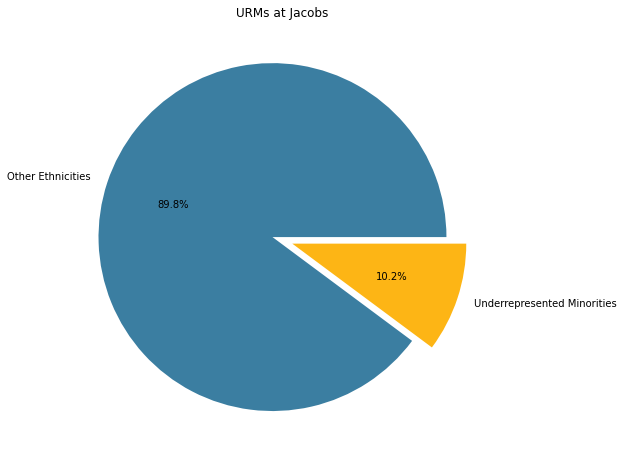

In [16]:
urms_jacobs = pd.DataFrame(index = ['Other Ethnicities', 'Underrepresented Minorities'], data = 
[ethnicities.groupby('Ethnicity').count()[['ppsk']].loc[[True,True,False,True]].sum(),
ethnicities.groupby('Ethnicity').count()[['ppsk']].loc['Underrepresented Minority']])

blue_gold = [(0.231,0.494,0.631),(0.992,0.709,0.082)]
plt.figure(figsize = (10,8))
plt.pie(urms_jacobs, labels = urms_jacobs.index, autopct="%.1f%%", explode=[0.06]*2, pctdistance=0.6, colors=blue_gold)
plt.title("URMs at Jacobs")

In [17]:
urms_jacobs

,ppsk
Other Ethnicities,4891
Underrepresented Minorities,554


In [18]:
urms_jacobs.sum() # 380 students missing!

ppsk    5445
dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if sys.path[0] == '':


[Text(0.5, 1.0, 'URM Women at Berkeley vs Jacobs'), None]

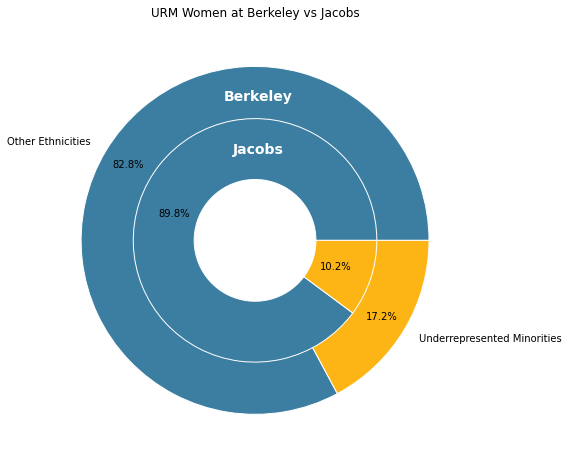

In [30]:
fig, ax = plt.subplots(figsize=(12,8))
font = {'family': 'sans-serif',
        'color':  'white',
        'weight': 'bold',
        'size': 14
        }
size = 0.3
ax.pie(urms_berk, radius=1, colors=blue_gold,
       wedgeprops=dict(width=.35, edgecolor='w'), labels=urms_berk.index, autopct="%.1f%%", pctdistance=0.85)

ax.pie(urms_jacobs, radius=1-size, colors=blue_gold,
       wedgeprops=dict(width=.35, edgecolor='w'), autopct="%.1f%%", pctdistance=0.7)
ax.text(-.13,.5,"Jacobs", fontdict=font)
ax.text(-.18,.8,"Berkeley", fontdict=font)
ax.set(aspect="equal", title='URM Women at Berkeley vs Jacobs')

In [20]:
women_jacobs = ethnicities.groupby(['Ethnicity','Gender']).count()[['ppsk']].loc['Underrepresented Minority'].reindex(['Male','Female']).rename(index={'Male':'Men', 'Female':'Women'})['ppsk']

In [21]:
women_jacobs.sum()

554

In [31]:
urms_women

Gender
Men      5915
Women    7854
Name: ppsk, dtype: int64

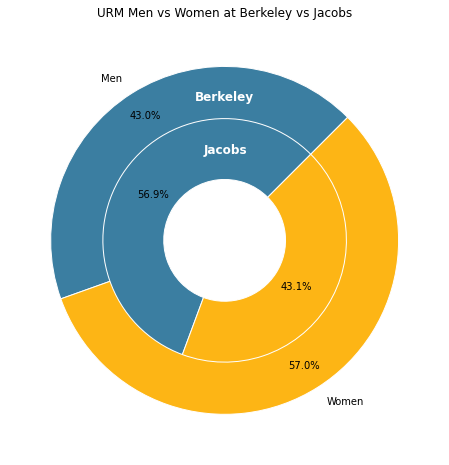

In [22]:
fig, ax = plt.subplots(figsize=(12,8))
font = {'family': 'sans-serif',
        'color':  'white',
        'weight': 'bold',
        'size': 12
        }
size = 0.3
ax.pie(urms_women, radius=1.0, colors=blue_gold,
       wedgeprops=dict(width=.35, edgecolor='w'), labels=urms_women.index, autopct="%.1f%%", pctdistance=.85, startangle=45)

ax.pie(women_jacobs, radius=1-size, colors=blue_gold,
       wedgeprops=dict(width=.35, edgecolor='w'), autopct="%.1f%%", pctdistance=0.7, startangle=45)
'''ax.text(.35,.2,"Jacobs", fontdict=font)
ax.text(.5,.5,"Berkeley", fontdict=font)'''
ax.text(-.12,.5,"Jacobs", fontdict=font)
ax.text(-.17,.8,"Berkeley", fontdict=font)
ax.set(aspect="equal", title='URM Men vs Women at Berkeley vs Jacobs')
plt.show()

In [23]:
jacobs_incomes = cleaned_jacobs[cleaned_jacobs['ppsk'].isin(stem_paths[(~stem_paths['income.parent'].isna()) | (~stem_paths['income.student'].isna())]['ppsk'])].merge(stem_paths[['income.parent','income.student','ppsk']], on='ppsk').drop_duplicates(subset=['ppsk']).fillna(0)
jacobs_incomes

,ppsk,year,term,DES INV Students,All Courses Students,Maker Pass Holders,income.parent,income.student
0,781707,2015,Fall,N,N,Y,18000.0,0.0
2,895798,2015,Fall,N,N,Y,0.0,22000.0
7,857674,2015,Fall,N,N,Y,150000.0,0.0
8,856881,2015,Fall,N,Y,Y,180000.0,0.0
9,946962,2015,Fall,N,Y,Y,97436.0,0.0
...,...,...,...,...,...,...,...,...
7927,2734942,2020,Fall,N,N,Y,160000.0,0.0
7928,2736241,2020,Fall,N,Y,N,75000.0,0.0
7929,2738497,2020,Fall,N,Y,N,750000.0,0.0
7930,2743294,2020,Fall,N,Y,N,15000.0,0.0


## Variable 'ethnicities' created by merging cleaned Jacobs data with gender and ethnicity from 'stem_paths'

Text(0.5, 0, 'Number of Students; n = 183')

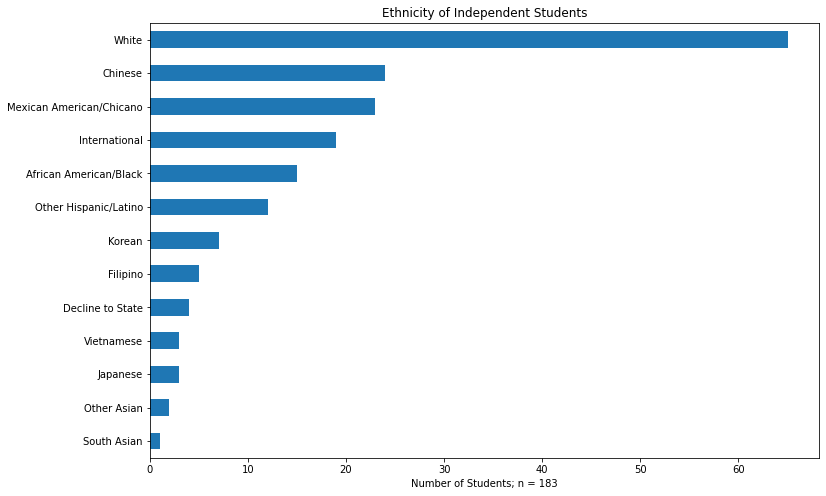

In [24]:
jacobs_incomes = ethnicities[ethnicities['ppsk'].isin(stem_paths[(~stem_paths['income.parent'].isna()) | (~stem_paths['income.student'].isna())]['ppsk'])].merge(stem_paths[['income.parent','income.student','ethnic.l3','ppsk']], on='ppsk').drop_duplicates(subset=['ppsk']).fillna(0)#.merge(student_majors[['ppsk', 'college']], on='ppsk').drop_duplicates()
jacobs_incomes[jacobs_incomes['income.student'] != 0].groupby('ethnic.l3').count()['ppsk'].sort_values().plot(kind='barh', figsize=(12,8), xlabel="", title= "Ethnicity of Independent Students").set_xlabel("Number of Students; n = 183")

# Stop here ---------------------------------------------------------------------

In [25]:
indep_jacobs = jacobs_incomes[jacobs_incomes['income.student'] != 0]

In [ ]:
incomes_berkeley = student_courses[(~student_courses['ppsk'].isin(indep_jacobs)) & (student_courses['undergrad.status'] == 'Undergraduate')].drop_duplicates(subset='ppsk')
incomes_berkeley = incomes_berkeley.merge(stem_paths[['income.parent','income.student','ethnic.l1','ppsk']], on='ppsk').drop_duplicates(subset='ppsk')#
incomes_berkeley[['income.parent','income.student']] = indep_berkeley[['income.parent','income.student']].fillna(0)
incomes_berkeley['Income'] = indep_berkeley['income.parent'] + indep_berkeley['income.student']

In [30]:
incomes_berkeley

,year.name,ppsk,undergrad.status,course.department,course.subject,course.number,offering.type,section.number,ccn,room.share,course.title,instructor.name,grade.subtype,grade.type,grade.name,grade.points,student.credit.hours,income.parent,income.student,ethnic.l1
0,2007 Summer,680817,Undergraduate,Music,Music,26AC,Primary,2,64620,64620.0,American Culture,Bonnie Wade; Rebecca Bodenheimer; Shalini Ayya...,A,Letter Grade,A+,4.0,4.0,500000.0,NaN,White/Other
1,2007 Summer,692430,Undergraduate,Psychology,Psychology,160,Primary,1,75390,75390.0,Social Psychology,Sara Gorchoff; Stephen Hinshaw,A,Letter Grade,A+,4.0,3.0,33000.0,NaN,Asian/Pacific Islander
2,2007 Summer,728540,Undergraduate,Ethnic Studies,Ethnic Studies,122AC,Primary,1,45230,45230.0,Eth/Race In Am Film,Diane Pearson,A,Letter Grade,A+,4.0,4.0,NaN,33000.0,White/Other
3,2007 Summer,731964,Undergraduate,Electrical Eng & Computer Sci,Electrical Engineering,100,Primary,1,37285,200007.0,Elec Tech For Eng,Bharathwaj Muthuswamy; Jean Walrand,A,Letter Grade,A+,4.0,4.0,NaN,NaN,White/Other
4,2007 Summer,732318,Undergraduate,Business,Business Admin-Undergrad,103,Primary,1,20180,20180.0,Intro To Finance,Avinash Verma,A,Letter Grade,A+,4.0,4.0,100000.0,NaN,International
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80304,2018 Fall,2423817,Undergraduate,Anthropology,Anthropology,107,Primary,1,20477,20477.0,Evol Hum Brain,NaN,C,Letter Grade,C,2.0,4.0,22454.0,NaN,White/Other
80305,2018 Fall,2632260,Undergraduate,Education,Education,140AC,Primary,3,28512,28512.0,Art Of Making Mean,NaN,A,Letter Grade,A,4.0,4.0,600000.0,NaN,White/Other
80306,2018 Fall,2763201,Undergraduate,English,English,45A,Primary,1,21275,21275.0,Lit In English,NaN,A,Letter Grade,A-,3.7,4.0,35000.0,NaN,Asian/Pacific Islander
80307,2019 Fall,2428229,Undergraduate,East Asian Lang & Culture,Japanese,1A,Primary,2,22247,22247.0,Elementary Japanese,NaN,A,Letter Grade,A,4.0,5.0,10000.0,NaN,Underrepresented Minority


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


Text(0.5, 1.0, 'Proportion of Independent Students at Jacobs; n = 183')

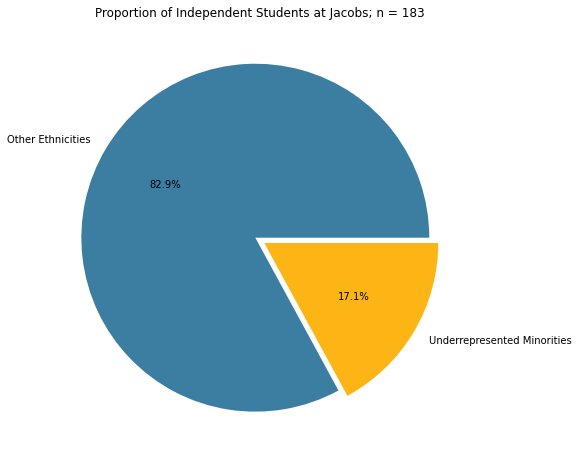

In [31]:
indep_students_berkeley = pd.DataFrame(index = ['Other Ethnicities', 'Underrepresented Minorities'], data = 
[incomes_berkeley[incomes_berkeley['income.student'] != 0].groupby('ethnic.l1').count()[['ppsk']].loc[[True,True,False,True]].sum(),
incomes_berkeley[incomes_berkeley['income.student'] != 0].groupby('ethnic.l1').count()[['ppsk']].loc['Underrepresented Minority']])

blue_gold = [(0.231,0.494,0.631),(0.992,0.709,0.082)]
plt.figure(figsize = (12,8))
plt.pie(indep_students_berkeley, labels = indep_students_berkeley.index, autopct="%.1f%%", explode=[0.03]*2, pctdistance=0.6, colors=blue_gold)
plt.title("Proportion of Independent Students at Jacobs; n = 183")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


Text(0.5, 1.0, 'Proportion of Independent Students at Jacobs; n = 183')

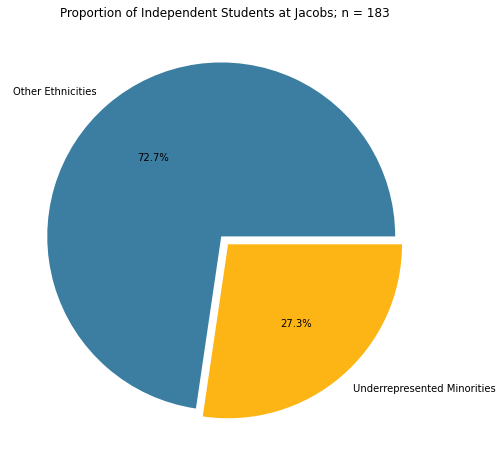

In [35]:
indep_students = pd.DataFrame(index = ['Other Ethnicities', 'Underrepresented Minorities'], data = 
[jacobs_incomes[jacobs_incomes['income.student'] != 0].groupby('Ethnicity').count()[['ppsk']].loc[[True,True,False,True]].sum(),
jacobs_incomes[jacobs_incomes['income.student'] != 0].groupby('Ethnicity').count()[['ppsk']].loc['Underrepresented Minority']])

blue_gold = [(0.231,0.494,0.631),(0.992,0.709,0.082)]
plt.figure(figsize = (12,8))
plt.pie(indep_students, labels = indep_students.index, autopct="%.1f%%", explode=[0.03]*2, pctdistance=0.6, colors=blue_gold)
plt.title("Proportion of Independent Students at Jacobs; n = 183")

In [36]:
waivers = waivers.loc[waivers['ppsk'] != 'MISSING']
waivers['ppsk'] = waivers.loc[:,'ppsk'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
jacobs_incomes[(jacobs_incomes['Ethnicity'] == 'Underrepresented Minority') & (jacobs_incomes['income.student'] != 0)]#.groupby('income.student').agg()

,ppsk,year,term,DES INV Students,All Courses Students,Maker Pass Holders,Ethnicity,Gender,income.parent,income.student,ethnic.l3
42,1313676,2015,Fall,N,Y,N,Underrepresented Minority,Male,0.0,12000.0,Mexican American/Chicano
292,1309075,2015,Fall,N,N,Y,Underrepresented Minority,Male,0.0,20000.0,African American/Black
300,1318356,2015,Fall,N,Y,Y,Underrepresented Minority,Male,0.0,5000.0,African American/Black
577,2425148,2015,Fall,N,Y,N,Underrepresented Minority,Male,0.0,27000.0,African American/Black
1018,1486891,2016,Spring,N,Y,N,Underrepresented Minority,Female,0.0,7200.0,African American/Black
1029,1487348,2016,Spring,N,Y,N,Underrepresented Minority,Male,0.0,4000.0,Mexican American/Chicano
1034,2424278,2016,Spring,N,Y,Y,Underrepresented Minority,Male,0.0,9000.0,Mexican American/Chicano
1174,2427246,2016,Spring,N,Y,Y,Underrepresented Minority,Male,0.0,12687.0,Other Hispanic/Latino
1200,2428250,2016,Spring,Y,Y,N,Underrepresented Minority,Female,0.0,16000.0,Other Hispanic/Latino
1217,2636386,2016,Spring,Y,Y,N,Underrepresented Minority,Male,0.0,10695.0,African American/Black


In [38]:
urm_jacobs_incomes = jacobs_incomes[jacobs_incomes['Ethnicity'] == 'Underrepresented Minority'].merge(student_majors[['college','ppsk']], on='ppsk',how='left').drop_duplicates()
filler = urm_jacobs_incomes[urm_jacobs_incomes['college'].isna()].merge(stem_paths[['major.intended.college','ppsk']], on ='ppsk')
test =urm_jacobs_incomes.merge(filler[['ppsk','major.intended.college']], on='ppsk', how='left')

test['college'].fillna(value = test['major.intended.college'],inplace = True)

In [39]:
test

,ppsk,year,term,DES INV Students,All Courses Students,Maker Pass Holders,Ethnicity,Gender,income.parent,income.student,ethnic.l3,college,major.intended.college
0,1029831,2015,Fall,N,Y,N,Underrepresented Minority,Female,100000.0,0.0,Mexican American/Chicano,Clg of Letters & Science,Clg of Letters & Science
1,1033557,2015,Fall,N,Y,N,Underrepresented Minority,Male,20276.0,0.0,Mexican American/Chicano,Clg of Natural Resources,Clg of Natural Resources
2,1313676,2015,Fall,N,Y,N,Underrepresented Minority,Male,0.0,12000.0,Mexican American/Chicano,Clg of Engineering,Clg of Engineering
3,1487078,2015,Fall,N,Y,N,Underrepresented Minority,Male,100000.0,0.0,African American/Black,Clg of Letters & Science,Clg of Letters & Science
4,1306876,2015,Fall,N,Y,N,Underrepresented Minority,Male,400000.0,0.0,Mexican American/Chicano,Clg of Letters & Science,Clg of Letters & Science
...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,2741723,2020,Spring,Y,Y,N,Underrepresented Minority,Male,16000.0,0.0,African American/Black,Clg of Letters & Science,NaN
533,2744968,2020,Spring,N,N,Y,Underrepresented Minority,Female,30000.0,0.0,Mexican American/Chicano,Clg of Letters & Science,NaN
534,2772410,2020,Spring,N,N,Y,Underrepresented Minority,Male,11448.0,0.0,African American/Black,Clg of Letters & Science,NaN
535,1482699,2020,Fall,N,Y,N,Underrepresented Minority,Male,72000.0,0.0,Native American/Alaska Native,Clg of Letters & Science,Clg of Letters & Science


In [40]:
temporary = ethnicities.merge(student_majors[['college','ppsk']], on ='ppsk', how='left').drop_duplicates()
new_filler = temporary[temporary['college'].isna()].merge(stem_paths[['major.intended.college','ppsk']], on ='ppsk')
new_test = temporary.merge(new_filler[['ppsk','major.intended.college']], on='ppsk', how='left')

new_test['college'].fillna(value = new_test['major.intended.college'],inplace = True)

In [41]:
full_graph = new_test[new_test['Ethnicity'] == 'Underrepresented Minority'].groupby('college').count()['ppsk']
full_graph

college
Clg of Chemistry                10
Clg of Engineering             169
Clg of Environmental Design     52
Clg of Letters & Science       301
Clg of Natural Resources        25
Haas School of Business         12
Name: ppsk, dtype: int64

In [42]:
len(test[test['income.student'] != 0])

50

In [43]:
temporary = ethnicities.merge(student_majors[['college','ppsk']], on ='ppsk', how='left').drop_duplicates()
temporary

,ppsk,year,term,DES INV Students,All Courses Students,Maker Pass Holders,Ethnicity,Gender,college
0,781707,2015,Fall,N,N,Y,Asian/Pacific Islander,Male,NaN
1,895798,2015,Fall,N,N,Y,White/Other,Male,NaN
2,857674,2015,Fall,N,N,Y,Asian/Pacific Islander,Female,NaN
3,856881,2015,Fall,N,Y,Y,International,Male,NaN
4,946962,2015,Fall,N,Y,Y,White/Other,Male,NaN
...,...,...,...,...,...,...,...,...,...
13297,2734942,2020,Fall,N,N,Y,White/Other,Female,Clg of Letters & Science
13302,2736241,2020,Fall,N,Y,N,Underrepresented Minority,Female,Clg of Letters & Science
13307,2738497,2020,Fall,N,Y,N,International,Male,Clg of Letters & Science
13315,2743294,2020,Fall,N,Y,N,Asian/Pacific Islander,Male,Clg of Letters & Science


In [44]:
graphing_more = test[test['income.student'] != 0].groupby('college').count()['ppsk']

Text(0.5, 1.0, 'Colleges of Independent URM Students at Jacobs; n = 50')

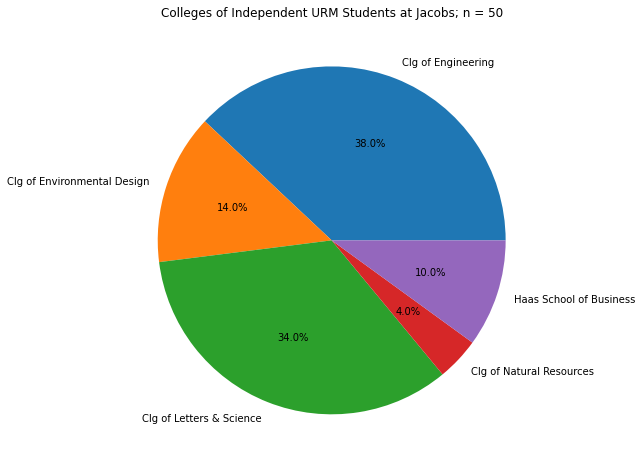

In [45]:
plt.figure(figsize = (12,8))
plt.pie(graphing_more, labels = graphing_more.index, autopct="%.1f%%", explode=[0.00]*5, pctdistance=0.6)
plt.title("Colleges of Independent URM Students at Jacobs; n = 50")

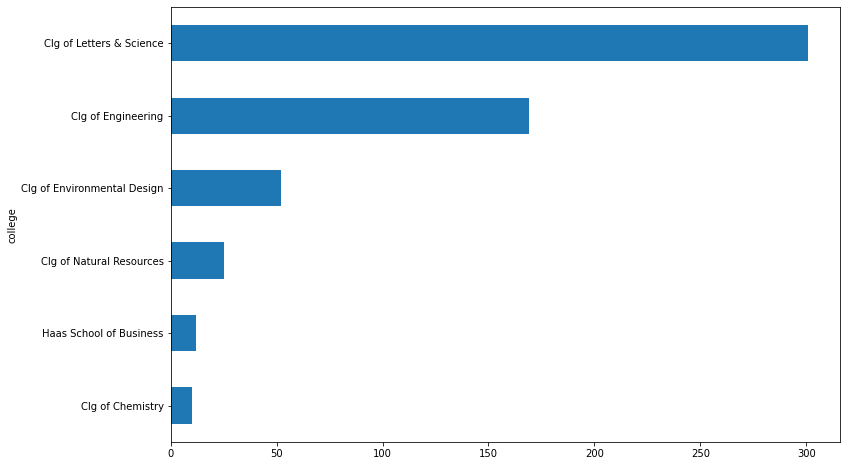

In [46]:
full_graph.sort_values().plot(kind='barh',figsize=(12,8))

Text(0.5, 1.0, 'Colleges of URM Students in Jacobs; n = 569')

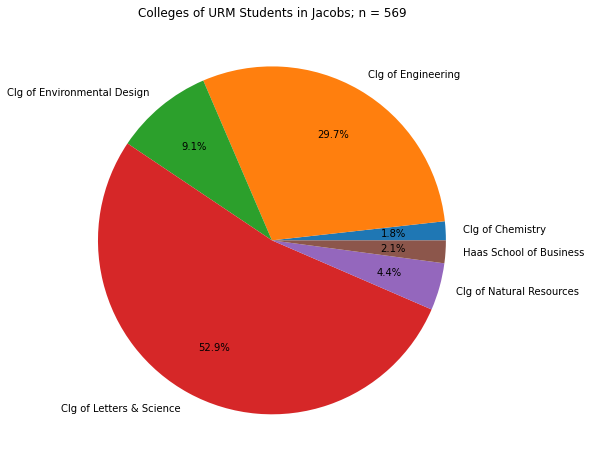

In [47]:
plt.figure(figsize = (12,8))
plt.pie(full_graph, labels = full_graph.index, autopct="%.1f%%", explode=[0.00]*6, pctdistance=0.7)
plt.title("Colleges of URM Students in Jacobs; n = 569")

Text(0.5, 0, 'Number of Students; n = 50')

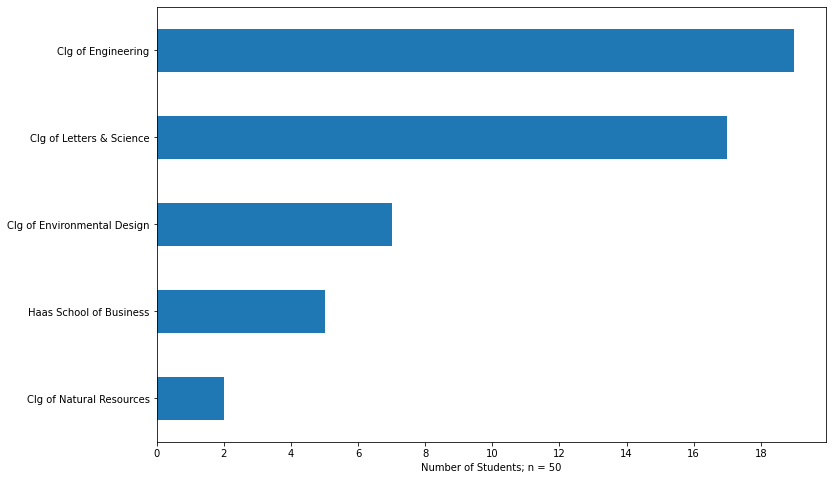

In [48]:
test[test['income.student'] != 0].groupby('college').count()['ppsk'].sort_values().plot(kind='barh',figsize=(12,8), xticks=range(0,20,2), xlabel="", title="").set_xlabel("Number of Students; n = 50")

In [49]:
urm_jacobs_incomes

,ppsk,year,term,DES INV Students,All Courses Students,Maker Pass Holders,Ethnicity,Gender,income.parent,income.student,ethnic.l3,college
0,1029831,2015,Fall,N,Y,N,Underrepresented Minority,Female,100000.0,0.0,Mexican American/Chicano,NaN
1,1033557,2015,Fall,N,Y,N,Underrepresented Minority,Male,20276.0,0.0,Mexican American/Chicano,NaN
2,1313676,2015,Fall,N,Y,N,Underrepresented Minority,Male,0.0,12000.0,Mexican American/Chicano,NaN
3,1487078,2015,Fall,N,Y,N,Underrepresented Minority,Male,100000.0,0.0,African American/Black,NaN
4,1306876,2015,Fall,N,Y,N,Underrepresented Minority,Male,400000.0,0.0,Mexican American/Chicano,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1244,2741723,2020,Spring,Y,Y,N,Underrepresented Minority,Male,16000.0,0.0,African American/Black,Clg of Letters & Science
1248,2744968,2020,Spring,N,N,Y,Underrepresented Minority,Female,30000.0,0.0,Mexican American/Chicano,Clg of Letters & Science
1253,2772410,2020,Spring,N,N,Y,Underrepresented Minority,Male,11448.0,0.0,African American/Black,Clg of Letters & Science
1258,1482699,2020,Fall,N,Y,N,Underrepresented Minority,Male,72000.0,0.0,Native American/Alaska Native,NaN


In [50]:
stem_paths[stem_paths['ppsk'] == 1029831]

,ppsk,count,year,term,entry,residency,gender,ethnic.l1,ethnic.l2,ethnic.l3,probation.year.1,GradYr,RetainY1,RetainY2,RetainY3,RetainY4,RetainY5,RetainY6,hs.gpa.unweighted,hs.gpa.weighted,sat.total,sat.math,sat.verbal,sat.writing,act.composite,act.english,act.writing,act.math,act.reading,act.science,first.generation.college.1,first.generation.college.2,hs.api,ceeb,income.parent,income.student,major.intended.college,major.intended.division,major.intended.department,esl,...,final.major.college.2,final.major.division.2,final.major.department.2,final.major.major.2,first.major.college.3,first.major.division.3,first.major.department.3,first.major.major.3,final.major.college.3,final.major.division.3,final.major.department.3,final.major.major.3,first.major.college.4,first.major.division.4,first.major.department.4,first.major.major.4,final.major.college.4,final.major.division.4,final.major.department.4,final.major.major.4,year.degree,term.degree,academic.year.degree,gpa.cum.degree,degree.college.1,degree.division.1,degree.department.1,degree.major.1,degree.college.2,degree.division.2,degree.department.2,degree.major.2,degree.college.3,degree.division.3,degree.department.3,degree.major.3,degree.college.4,degree.division.4,degree.department.4,degree.major.4
34745,1029831,1,2011,Fall,NEW FRESHMEN,Resident,Female,Underrepresented Minority,Chicano/Latino,Mexican American/Chicano,N,4.5,Y,N,Y,Y,Y,N,3.92,4.21,1470.0,740.0,730.0,650.0,NaN,NaN,NaN,NaN,NaN,NaN,N,N,10.0,52609,100000.0,NaN,Clg of Letters & Science,L&S Math & Phys Sciences Div,Mathematics,English,...,NaN,NaN,NaN,NaN,Clg of Letters & Science,L&S-Math & Phys Sci Div,Mathematics,Applied Mathematics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015.0,Fall,2015-16,3.096,Clg of Letters & Science,L&S Math & Phys Sciences Div,Mathematics,Applied Mathematics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
